In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

Price Elasticity formula:

𝛽 = (Δ % Quantity) / (Δ % Price) = (ΔQ/Q) / (ΔP/P) = (ΔQ/ΔP) * (P/Q)

𝑄 = 𝐴 * 𝑃^𝛽  <--> ln(𝑄) = ln⁡(𝐴) + 𝛽 x ln⁡(𝑃)   <--> 𝑌 = 𝛼 + 𝛽𝑋

In [2]:
df = pd.read_csv('price_data.csv')
df

,Price,Quantity
0,192,80
1,145,960
2,240,200
3,240,150
4,375,740
...,...,...
995,96,1500
996,157,10000
997,291,570
998,216,100


<Axes: xlabel='Quantity', ylabel='Price'>

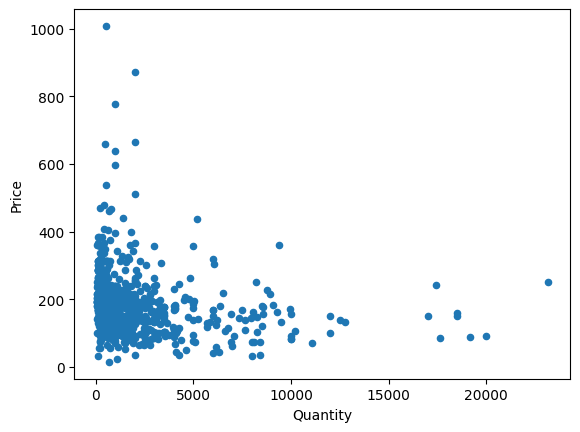

In [3]:
df.plot(x="Quantity", y="Price",kind="scatter")

In [4]:
df.describe()

,Price,Quantity
count,1000.000000,1000.000000
mean,192.404000,1611.900000
std,84.275947,2534.252992
min,15.000000,60.000000
25%,145.000000,300.000000
50%,187.000000,700.000000
75%,216.000000,1907.500000
max,1008.000000,23150.000000


array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Quantity'}>]], dtype=object)

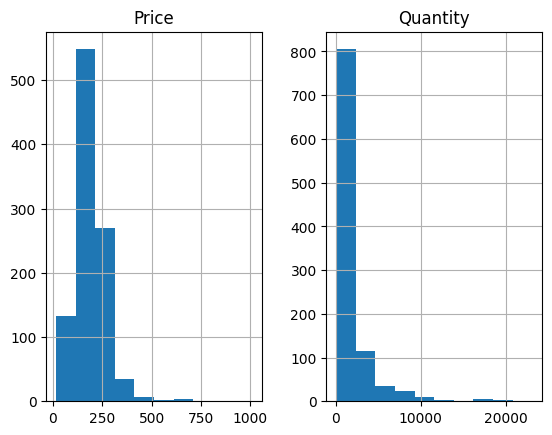

In [5]:
df.hist()

While the relationship between price and quantity is not necessarily linear (from the scatter plot in Fig.2), we explore a linear regression demand function to examine how well the linear model performs. By utilizing Python’s Statsmodels for Ordinary Least Squares (OLS) Estimation, we analyze the coefficient (b) to determine the linear price elasticity.

In [6]:
x_value = df['Price']
y_value = df['Quantity']
X = add_constant(x_value)
X

,const,Price
0,1.0,192
1,1.0,145
2,1.0,240
3,1.0,240
4,1.0,375
...,...,...
995,1.0,96
996,1.0,157
997,1.0,291
998,1.0,216


In [7]:
model = sm.OLS(y_value, X)
model

In [8]:
result = model.fit()
result  

In [9]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     51.14
Date:                Tue, 14 Jan 2025   Prob (F-statistic):           1.66e-12
Time:                        18:30:12   Log-Likelihood:                -9231.1
No. Observations:                1000   AIC:                         1.847e+04
Df Residuals:                     998   BIC:                         1.848e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2889.2504    194.994     14.817      0.0

The small P values (0.000) indicate that we can reject the null hypothesis that Price does not affect Quantity. A low R-squared (0.049) indicates that our model cannot explain a lot of the response variability.

Despite the linear model’s limitations in capturing the complexity of pricing data, we still employ the linear price elasticity formula for calculation purposes. In this case, linear price elasticity is -1.77. Now the linear demand function of this product can be written as Quantity = 2889.2504 + (-6.6389)*Price.

In [10]:
coefficient_pvalue = result.f_pvalue
intercept,slope = result.params

coefficient_pvalue,intercept,slope

(1.6641207951448687e-12, 2889.2504486537982, -6.638897573095132)

In [11]:
# Calculate mean price and mean quantity 
mean_price = df['Price'].mean() 
mean_quantity = df['Quantity'].mean()

mean_price,mean_quantity

(192.404, 1611.9)

In [12]:
#Linear Price elasticity Formula
price_elasticity = round((slope)*(mean_price/mean_quantity),2)

print('Linear Price Elasticity {} with pvalue {}'\
.format(price_elasticity, coefficient_pvalue))

Linear Price Elasticity -0.79 with pvalue 1.6641207951448687e-12


Observing that the price curve exhibits a power curve pattern (𝑄 = 𝐴 * 𝑃^𝛽), we utilize a non-linear model derived from a power regression demand function. By applying logarithmic functions and taking total differentials, we can determine the elasticity as 𝛽 --> ln(𝑄) = ln⁡(𝐴) + 𝛽*ln⁡(𝑃)

In [13]:
y_value = np.log(df['Quantity'])
y_value

0      4.382027
1      6.866933
2      5.298317
3      5.010635
4      6.606650
         ...   
995    7.313220
996    9.210340
997    6.345636
998    4.605170
999    6.214608
Name: Quantity, Length: 1000, dtype: float64

In [14]:
x_value = np.log(df['Price'])
X = add_constant(x_value)
X

,const,Price
0,1.0,5.257495
1,1.0,4.976734
2,1.0,5.480639
3,1.0,5.480639
4,1.0,5.926926
...,...,...
995,1.0,4.564348
996,1.0,5.056246
997,1.0,5.673323
998,1.0,5.375278


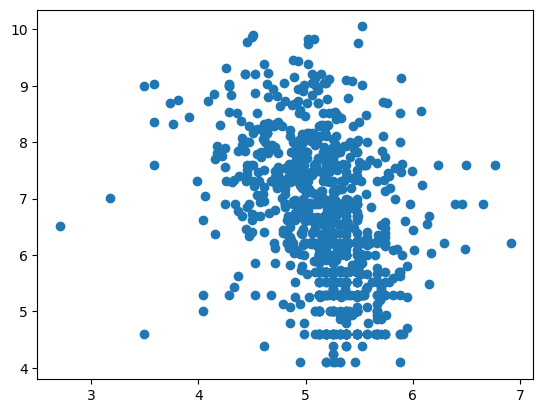

In [15]:
plt.scatter(x_value, y_value)

(array([  1.,   3.,   7.,  33., 104., 354., 399.,  84.,  11.,   4.]),
 array([2.7080502 , 3.12881753, 3.54958485, 3.97035218, 4.3911195 ,
        4.81188682, 5.23265415, 5.65342147, 6.0741888 , 6.49495612,
        6.91572345]),
 <BarContainer object of 10 artists>)

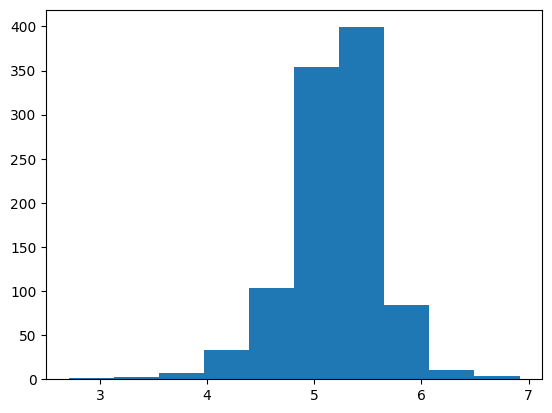

In [16]:
plt.hist(x_value)

(array([ 73.,  57., 177., 179., 168., 135., 107.,  60.,  35.,   9.]),
 array([ 4.09434456,  4.68988511,  5.28542566,  5.88096621,  6.47650676,
         7.07204731,  7.66758786,  8.26312841,  8.85866896,  9.45420951,
        10.04975006]),
 <BarContainer object of 10 artists>)

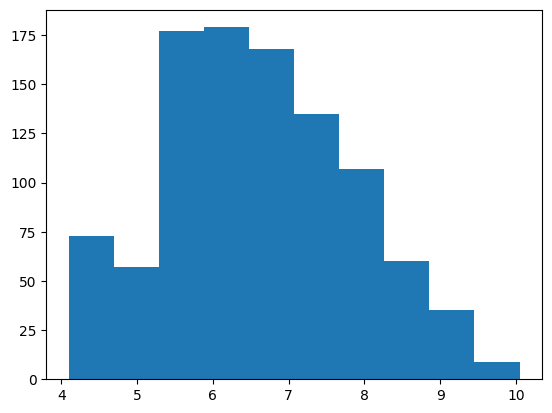

In [17]:
plt.hist(y_value)

In [18]:
model = sm.OLS(y_value, X)
result = model.fit()
    
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     152.6
Date:                Tue, 14 Jan 2025   Prob (F-statistic):           1.01e-32
Time:                        18:30:12   Log-Likelihood:                -1562.7
No. Observations:                1000   AIC:                             3129.
Df Residuals:                     998   BIC:                             3139.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1370      0.449     27.027      0.0

The small P values (0.000) indicate that we can reject the null hypothesis that Price does not affect Quantity. We have an improved R-squared (0.132), but it still indicates that our model has room for further enhancement. In this exercise, we focus on applying the non-linear price elasticity concept, rather than building a perfect model.

Similarly, we can get beta from the coefficient (price) of the linear regression fit, which is the non-linear price elasticity. The linear price elasticity is -1.07 <-- relatively elastic demand

In [19]:
coefficient_pvalue = result.f_pvalue
intercept,slope = result.params

#Non_linear Price elasticity Formula
price_elasticity = round((slope),2)
print('Non_linear Price Elasticity  {} with pvalue {}'.format(price_elasticity, coefficient_pvalue))

Non_linear Price Elasticity  -1.07 with pvalue 1.0083563155905758e-32


In [20]:
intercept

12.136969985964942

In [21]:
# Remember we fit the regression using a log function, so the intercept from the regression is log(a). 
# To get the non-linear demand function, we apply the exp() method returns the value of a.

nonlin_intercept = round(math.exp(intercept),0)
nonlin_intercept

186646.0

Now the non-linear demand function of this product can be written as:

𝑄 = 𝐴 * 𝑃^𝛽 --> Quantity = nonlin_intercept * Price^(price_elasticity)

Price optimization based on elasticity

The ultimate goal is to recommend the optimal price point for the business. We explore various price points to understand how demand and revenue fluctuate based on elasticity and the demand function.

In [28]:
# Set price range
price = list(np.linspace(15, 1000, num=100))
price

[15.0,
 24.949494949494948,
 34.898989898989896,
 44.84848484848485,
 54.7979797979798,
 64.74747474747474,
 74.6969696969697,
 84.64646464646465,
 94.5959595959596,
 104.54545454545455,
 114.4949494949495,
 124.44444444444444,
 134.3939393939394,
 144.34343434343435,
 154.2929292929293,
 164.24242424242425,
 174.1919191919192,
 184.14141414141415,
 194.0909090909091,
 204.04040404040404,
 213.989898989899,
 223.93939393939394,
 233.88888888888889,
 243.83838383838383,
 253.7878787878788,
 263.7373737373738,
 273.6868686868687,
 283.6363636363636,
 293.5858585858586,
 303.5353535353535,
 313.4848484848485,
 323.4343434343434,
 333.3838383838384,
 343.33333333333337,
 353.2828282828283,
 363.23232323232327,
 373.1818181818182,
 383.13131313131316,
 393.0808080808081,
 403.03030303030306,
 412.979797979798,
 422.92929292929296,
 432.8787878787879,
 442.82828282828285,
 452.77777777777777,
 462.72727272727275,
 472.67676767676767,
 482.62626262626264,
 492.5757575757576,
 502.525252525252

In [29]:
demand = nonlin_intercept * np.power(price, price_elasticity)
demand

array([10294.40001445,  5972.5886587 ,  4170.69978781,  3188.95629491,
        2573.59746874,  2152.83256232,  1847.50020146,  1616.13354719,
        1434.94421856,  1289.32430902,  1169.81534544,  1070.02737323,
         985.49046083,   912.98545857,   850.13606602,   795.15055442,
         746.65284222,   703.56886076,   665.04821053,   630.40896404,
         599.0980198 ,   570.66213071,   544.72640151,   520.978104  ,
         499.15433811,   479.03251459,   460.42293506,   443.16294986,
         427.11231632,   412.14947935,   398.16856784,   385.07695124,
         372.79323831,   361.24562752,   350.37053915,   340.11147465,
         330.41806031,   321.24524166,   312.55260147,   304.30377982,
         296.46597899,   289.0095389 ,   281.90757182,   275.1356468 ,
         268.67151616,   262.4948777 ,   256.58716719,   250.9313769 ,
         245.51189627,   240.3143718 ,   235.32558338,   230.53333493,
         225.92635744,   221.49422276,   217.22726693,   213.11652157,
      

In [30]:
revenue = price  * demand
revenue

array([154416.00021682, 149013.0705756 , 145553.20976654, 143019.85807495,
       141027.9421    , 139390.47196414, 138002.66656363, 136799.99116597,
       135739.92532109, 134792.9959428 , 133937.9488944 , 133158.96200221,
       132443.94526593, 131783.45659588, 131169.98392455, 130597.45469559,
       130060.89155636, 129556.16496614, 129079.81177075, 128628.89973297,
       128200.92474259, 127793.73169528, 127405.45279763, 127034.45889408,
       126679.32065622, 126338.77733369, 126011.71136778, 125697.12759795,
       125394.13610045, 125101.93792475, 124819.81316086, 124547.11089558,
       124283.24071062, 124027.66544745, 123779.89501937, 123539.48109439,
       123306.01250608, 123079.11127624, 122858.42915429, 122643.64459492,
       122434.46010917, 122230.59993509, 122031.80798284, 121837.84601639,
       121648.49203994, 121463.53886207, 121282.79281464, 121106.07260699,
       120933.20829852, 120764.04037546, 120598.41891934, 120436.20285644,
       120277.25927906, 1

In [31]:
# By using a price range between 15 and 1000, we see that the optimised price for max revenue is $15, which is the lowest price point. -->

min_revenue = np.min(revenue)
max_revenue = np.max(revenue)
max_index = np.argmax(revenue)
best_price = price[max_index]

percentage_difference = (max_revenue - min_revenue) / min_revenue
max_revenue, best_price, percentage_difference

(154416.0002168243, 15.0, 0.3417562034301535)

We can also see from the revenue and price chart, the highest revenue is when the price is lowest. The percentage difference between the highest revenue and the lowest revenue is also calculated.

In [32]:
import pandas as pd

# Creating a DataFrame
price_df = pd.DataFrame({
    'Price': price,
    'Demand': demand,
    'Revenue': revenue
})

price_df


,Price,Demand,Revenue
0,15.000000,10294.400014,154416.000217
1,24.949495,5972.588659,149013.070576
2,34.898990,4170.699788,145553.209767
3,44.848485,3188.956295,143019.858075
4,54.797980,2573.597469,141027.942100
...,...,...,...
95,960.202020,120.196186,115412.621015
96,970.151515,118.877688,115329.369397
97,980.101010,117.586887,115247.026371
98,990.050505,116.322927,115165.572947


(100000.0, 180000.0)

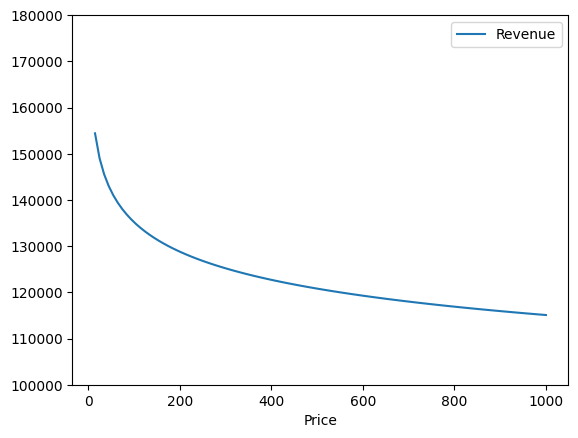

In [34]:
price_df.plot(kind='line', y='Revenue', x="Price")
plt.ylim(100000, 180000)

Price strategy based on elasticity
Once we have the price elasticity from the modelling, how does the business use this measure for its price strategy?

Elastic Demand: If a product has a high price elasticity of demand, meaning that consumers are highly sensitive to changes in price, businesses may need to adopt a lower pricing strategy to attract more customers and increase sales. This could involve lowering the price of the product or offering discounts, coupons, or other promotional offers.

Inelastic Demand: If a product has a low price elasticity of demand, meaning that consumers are relatively insensitive to changes in price, businesses may be able to adopt a higher pricing strategy without significantly reducing demand. This could involve raising the price of the product or offering premium features or services to justify a higher price point.

In [48]:
#add -0.8 inelastic 
elasticity1 = -0.8

demand1 = nonlin_intercept * np.power(price,elasticity1)
revenue1 = price  * demand1
max_revenue1 = np.max(revenue1)
max_index1 = np.argmax(revenue1)

print(price[max_index1])

data1 = {'Price': price, 'Revenue': revenue1, 'Quantity': demand1}
price_df1 = pd.DataFrame(data1)
price_df1

1000.0


,Price,Revenue,Quantity
0,15.000000,320801.905196,21386.793680
1,24.949495,355165.717546,14235.387060
2,34.898990,379822.998909,10883.495482
3,44.848485,399363.382579,8904.724071
4,54.797980,415691.933022,7585.898870
...,...,...,...
95,960.202020,737040.257855,767.588739
96,970.151515,738561.390196,761.284581
97,980.101010,740070.093178,755.095736
98,990.050505,741566.593008,749.018953


In [50]:
#add -2 perpectly elastic
elasticity2 = -2

demand2 = nonlin_intercept * np.power(price,elasticity2)
revenue2 = price  * demand2
max_revenue2 = np.max(revenue2)
max_index2 = np.argmax(revenue2)
print(price[max_index2])

data2 = {'Price': price, 'Revenue': revenue2, 'Quantity': demand2}
price_df2 = pd.DataFrame(data2)
price_df2

15.0


,Price,Revenue,Quantity
0,15.000000,12443.066667,829.537778
1,24.949495,7480.953036,299.843867
2,34.898990,5348.177713,153.247350
3,44.848485,4161.701351,92.794692
4,54.797980,3406.074470,62.156935
...,...,...,...
95,960.202020,194.382011,0.202439
96,970.151515,192.388505,0.198308
97,980.101010,190.435474,0.194302
98,990.050505,188.521696,0.190416


In [51]:
final_price_df = price_df1.merge(price_df, left_on='Price', right_on='Price')\
                          .merge(price_df2, left_on='Price', right_on='Price')

final_price_df = final_price_df.rename(columns={'Revenue_x':'-0.8_elasticity_rev',\
                                                'Revenue':'-2_elasticity_rev',\
                                                 'Revenue_y':'-1.07_elasticity_rev', 
                                                    })[['Price','-0.8_elasticity_rev','-1.07_elasticity_rev','-2_elasticity_rev']].set_index('Price')

final_price_df

,-0.8_elasticity_rev,-1.07_elasticity_rev,-2_elasticity_rev
Price,,,
15.000000,320801.905196,154416.000217,12443.066667
24.949495,355165.717546,149013.070576,7480.953036
34.898990,379822.998909,145553.209767,5348.177713
44.848485,399363.382579,143019.858075,4161.701351
54.797980,415691.933022,141027.942100,3406.074470
...,...,...,...
960.202020,737040.257855,115412.621015,194.382011
970.151515,738561.390196,115329.369397,192.388505
980.101010,740070.093178,115247.026371,190.435474


<Axes: xlabel='Price'>

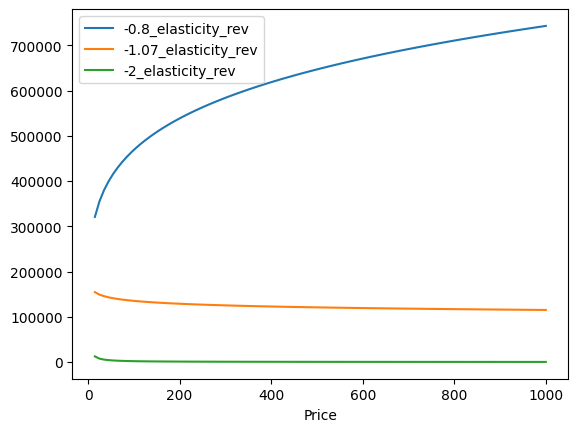

In [52]:
final_price_df.plot()